<a href="https://colab.research.google.com/github/jhunwillparian0912-cell/Data-Analysis/blob/main/abistat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data.xlsx


In [ ]:
!pip install scikit-posthocs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, f_oneway, kruskal, spearmanr
import scikit_posthocs as sp

In [ ]:
df = pd.read_excel("data.xlsx")
df.head()

,Student No,Strand,Reading Comprehension,Numeracy
0,1,TVL,5,3
1,2,TVL,8,1
2,3,TVL,10,3
3,4,TVL,10,3
4,5,TVL,9,2


In [ ]:
#table summary for variable 1
reading_comprehension_table = df.groupby('Strand')['Reading Comprehension'].mean().reset_index()

def interpret_reading_comprehension(score):
    if score >= 7:
        return "Independent"
    elif score >= 4:
        return "Instructional"
    else:
        return "Frustration"

reading_comprehension_table['Interpretation'] = reading_comprehension_table['Reading Comprehension'].apply(interpret_reading_comprehension)

total_mean = df['Reading Comprehension'].mean()

total_row = pd.DataFrame({
    'Strand': ['BCSHS'],
    'Reading Comprehension': [total_mean],
    'Interpretation': [interpret_reading_comprehension(total_mean)]
})

reading_comprehension_table = pd.concat([reading_comprehension_table, total_row], ignore_index=True)

print("Mean Reading Comprehension by Strand:")
print(reading_comprehension_table)

Mean Reading Comprehension by Strand:
  Strand  Reading Comprehension Interpretation
0   ACAD               8.512821    Independent
1     AD               9.250000    Independent
2    TVL               7.980198    Independent
3  BCSHS               8.300885    Independent


In [ ]:
reading_comprehension_table.to_excel('reading_comprehension_table.xlsx')
from google.colab import files
files.download('reading_comprehension_table.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#table summary for variable 2
numeracy_table = df.groupby('Strand')['Numeracy'].mean().reset_index()

def interpret_numeracy(score):
    if score >= 9:
        return "Highly Numerate"
    elif score >= 7:
        return "Numerate"
    elif score >= 5:
        return "Nearly Numerate"
    elif score >= 3:
        return "Low Numerate"
    else:
        return "Non-Numerate"

numeracy_table ['Interpretation'] = numeracy_table['Numeracy'].apply(interpret_numeracy)

total_mean = df['Numeracy'].mean()

total_row = pd.DataFrame({
    'Strand': ['BCSHS'],
    'Numeracy': [total_mean],
    'Interpretation': [interpret_numeracy(total_mean)]
})

numeracy_table = pd.concat([numeracy_table, total_row], ignore_index=True)

print("Mean Numeracy by Track:")
print(numeracy_table)

Mean Numeracy by Track:
  Strand  Numeracy Interpretation
0   ACAD  3.632479   Low Numerate
1     AD  3.125000   Low Numerate
2    TVL  3.158416   Low Numerate
3  BCSHS  3.402655   Low Numerate


In [ ]:
numeracy_table.to_excel('numeracy_table.xlsx')
from google.colab import files
files.download('numeracy_table.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

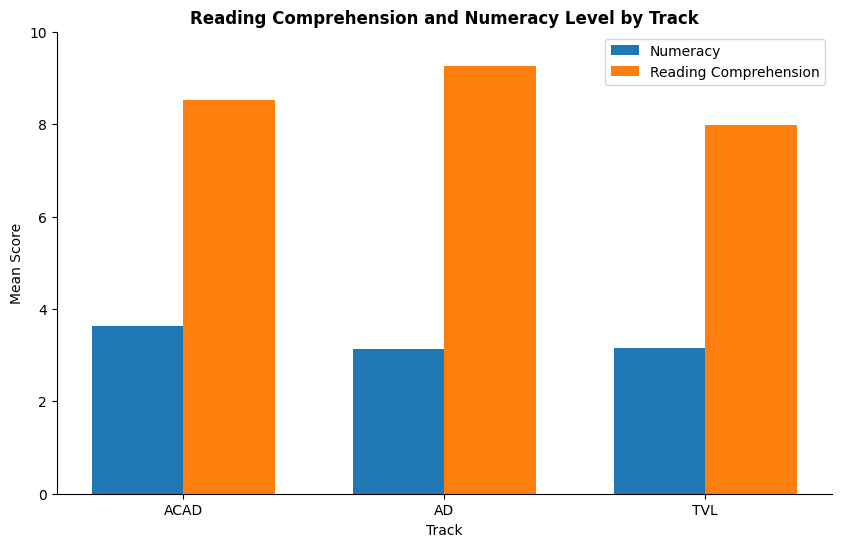

In [ ]:
#double bar graph
mean_std = df.groupby('Strand')[['Reading Comprehension','Numeracy']].agg(['mean','std'])
strands = mean_std.index
reading_comprehension_mean = mean_std['Reading Comprehension']['mean']
reading_comprehension_std = mean_std['Reading Comprehension']['std']
numeracy_mean = mean_std['Numeracy']['mean']
numeracy_std = mean_std['Numeracy']['std']
x = np.arange(len(strands))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
# Remove yerr to remove the SD lines
rects1 = ax.bar(x - width/2, numeracy_mean, width, label='Numeracy')
rects2 = ax.bar(x + width/2, reading_comprehension_mean, width, label='Reading Comprehension')

ax.set_ylabel('Mean Score')
ax.set_xlabel('Track')
ax.set_title('Reading Comprehension and Numeracy Level by Track', fontsize=12, fontweight = 'bold')
ax.set_xticks(x)
plt.ylim(0,10)
ax.set_xticks(x)
ax.set_xticklabels(strands)
ax.legend()

sns.despine()
plt.show()

In [ ]:
shapiro_results_list = []

for col in ['Reading Comprehension','Numeracy']:
    W, p = shapiro(df[col])
    interpretation = "fail to reject H0" if p > 0.05 else "reject H0"
    shapiro_results_list.append({
        'Variable': col,
        'W_statistic': W,
        'p_value': p,
        'Interpretation': interpretation
        })

shapiro_results = pd.DataFrame(shapiro_results_list)
print("Shapiro-Wilk Test Results:")
print(shapiro_results)

Shapiro-Wilk Test Results:
                Variable  W_statistic       p_value Interpretation
0  Reading Comprehension     0.779946  4.059994e-17      reject H0
1               Numeracy     0.936530  2.501572e-08      reject H0


In [ ]:
shapiro_results.to_excel('shapiro_results_RC.xlsx')
from google.colab import files
files.download('shapiro_results_RC.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

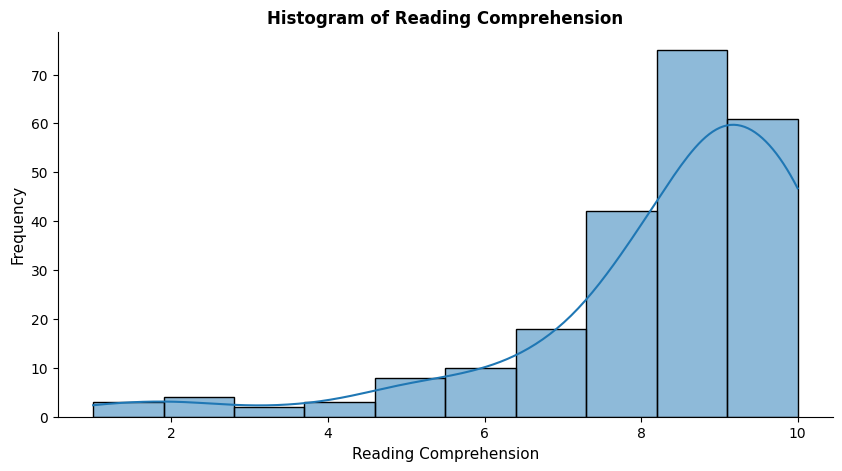

In [ ]:
#histogram variable 1
plt.figure(figsize=(10,5))

sns.histplot(
    df['Reading Comprehension'],
    bins=10,
    kde=True,
    line_kws={'color':'#4D4D4D', 'linewidth':1.5}
)

plt.title("Histogram of Reading Comprehension", fontsize=12, fontweight='bold')
plt.xlabel("Reading Comprehension", fontsize=11)
plt.ylabel("Frequency", fontsize=11)

sns.despine()
plt.show()

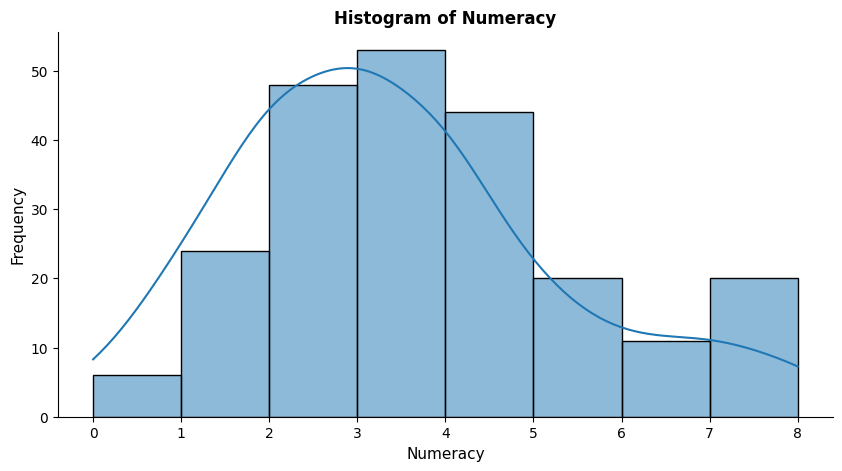

In [ ]:
#histogram variable 1
plt.figure(figsize=(10,5))

sns.histplot(
    df['Numeracy'],
    bins=8,
    kde=True,
    line_kws={'color':'#4D4D4D', 'linewidth':1.5}
)

plt.title("Histogram of Numeracy", fontsize=12, fontweight='bold')
plt.xlabel("Numeracy", fontsize=11)
plt.ylabel("Frequency", fontsize=11)

sns.despine()
plt.show()

In [ ]:
#NEEDS TO BE CHECKED
#levene's test
levene_results_list = []

group_col = 'Strand'

for col in ['Reading Comprehension', 'Numeracy']:
    groups = [
        df[df[group_col] == g][col].dropna()
        for g in df[group_col].unique()
    ]

    stat, p = levene(*groups)

    interpretation = (
        "fail to reject H0 (equal variances)"
        if p > 0.05
        else "reject H0 (variances not equal)"
    )

    levene_results_list.append({
        'Variable': col,
        'Levene_statistic': stat,
        'p_value': p,
        'Interpretation': interpretation
    })

levene_results = pd.DataFrame(levene_results_list)
print("Levene's Test Results:")
print(levene_results)

Levene's Test Results:
                Variable  Levene_statistic   p_value  \
0  Reading Comprehension          1.823819  0.163808   
1               Numeracy          0.440333  0.644380   

                        Interpretation  
0  fail to reject H0 (equal variances)  
1  fail to reject H0 (equal variances)  


In [ ]:
levene_results.to_excel('levene_results.xlsx')
from google.colab import files
files.download('levene_results.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

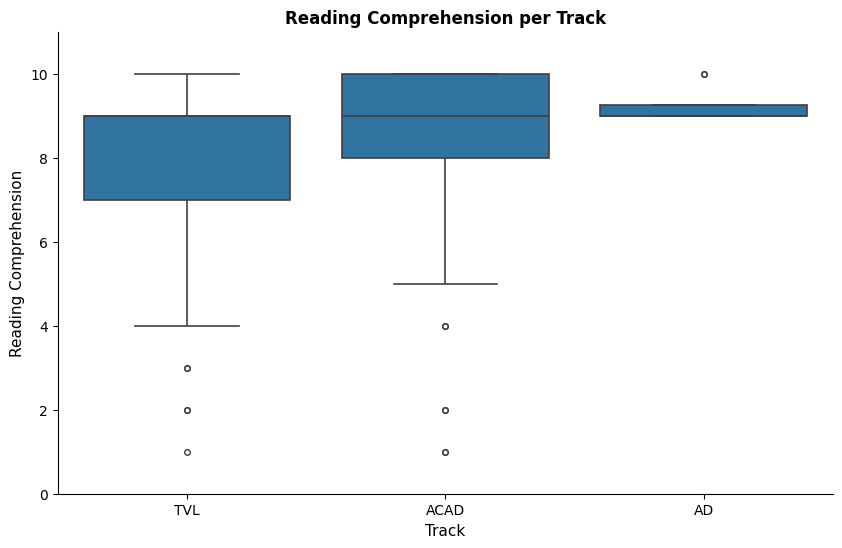

In [ ]:
#box plot for variable 1
plt.figure(figsize=(10,6))

sns.boxplot(
    x='Strand',
    y='Reading Comprehension',
    data=df,
    fliersize=4,
    linewidth=1.2
)

plt.title("Reading Comprehension per Track", fontsize=12, fontweight='bold')
plt.xlabel("Track", fontsize=11)
plt.ylabel("Reading Comprehension", fontsize=11)
plt.ylim(0,11)

sns.despine()

plt.show()

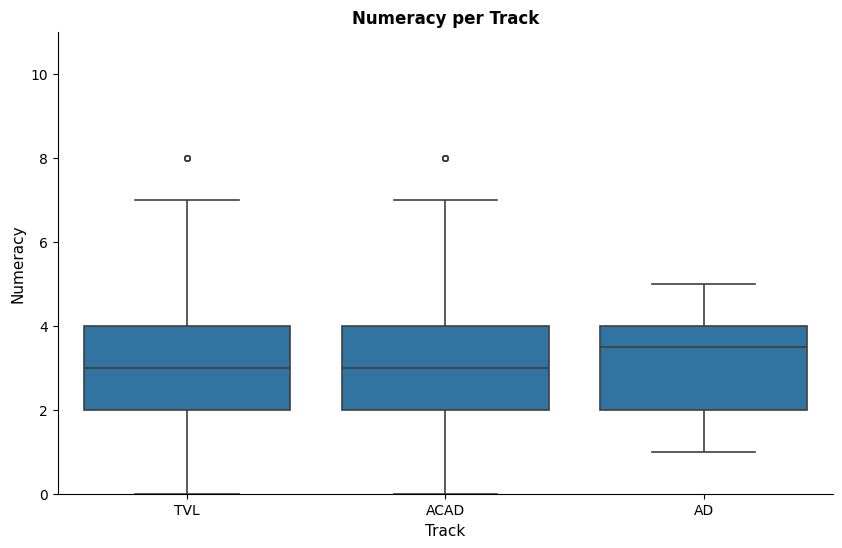

In [ ]:
#box plot for variable 1
plt.figure(figsize=(10,6))

sns.boxplot(
    x='Strand',
    y='Numeracy',
    data=df,
    fliersize=4,
    linewidth=1.2
)

plt.title("Numeracy per Track", fontsize=12, fontweight='bold')
plt.xlabel("Track", fontsize=11)
plt.ylabel("Numeracy", fontsize=11)
plt.ylim(0,11)

sns.despine()

plt.show()

In [ ]:
#kruskal-wallis variable 1
groups_rd = [group['Reading Comprehension'].values for name, group in df.groupby('Strand')]
H_rd, p_rd = kruskal(*groups_rd)

interpretation_rd = "reject H0" if p_rd < 0.05 else "fail to reject H0"

kruskal_rd_table = pd.DataFrame({
    'Variable': ['Reading Comprehension'],
    'H_statistic': [H_rd],
    'p_value': [p_rd],
    'Interpretation': [interpretation_rd]
})

print("Kruskal-Wallis Test Results - Reading Comprehension:")
print(kruskal_rd_table)

Kruskal-Wallis Test Results - Reading Comprehension:
                Variable  H_statistic   p_value Interpretation
0  Reading Comprehension     8.575476  0.013736      reject H0


In [ ]:
kruskal_rd_table.to_excel('kruskal_rd_table.xlsx')
from google.colab import files
files.download('kruskal_rd_table.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#kruskal-wallis variable 2
groups_num = [group['Numeracy'].values for name, group in df.groupby('Strand')]
H_num, p_num = kruskal(*groups_num)

interpretation_num = "reject H0" if p_num < 0.05 else "fail to reject H0"

kruskal_num_table = pd.DataFrame({
    'Variable': ['Numeracy'],
    'H_statistic': [H_num],
    'p_value': [p_num],
    'Interpretation': [interpretation_num]
})

print("Kruskal-Wallis Test Results - Numeracy:")
print(kruskal_num_table)

Kruskal-Wallis Test Results - Numeracy:
   Variable  H_statistic   p_value     Interpretation
0  Numeracy     4.509135  0.104919  fail to reject H0


In [ ]:
kruskal_num_table.to_excel('kruskal_num_table.xlsx')
from google.colab import files
files.download('kruskal_num_table.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#post-hoc variable 1
dunn_results = sp.posthoc_dunn(df, val_col='Reading Comprehension', group_col='Strand', p_adjust='bonferroni')

dunn_results_rounded = dunn_results.round(3)

def format_value(x, original):
    if x == 0.0:
        return f"{original:.2e}"
    else:
        return f"{x:.2f}"

dunn_results_formatted = dunn_results_rounded.copy()
for col in dunn_results.columns:
    dunn_results_formatted[col] = dunn_results_rounded[col].map(lambda x: format_value(x, dunn_results[col][dunn_results_rounded[col] == x].values[0]))

print("Post-hoc Dunn Test - Reading Comprehension")
print(dunn_results_formatted)

Post-hoc Dunn Test - Reading Comprehension
      ACAD    AD   TVL
ACAD  1.00  0.99  0.03
AD    0.99  1.00  0.17
TVL   0.03  0.17  1.00


In [ ]:
dunn_results_formatted.to_excel('dunn_results_rd.xlsx')
from google.colab import files
files.download('dunn_results_rd.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

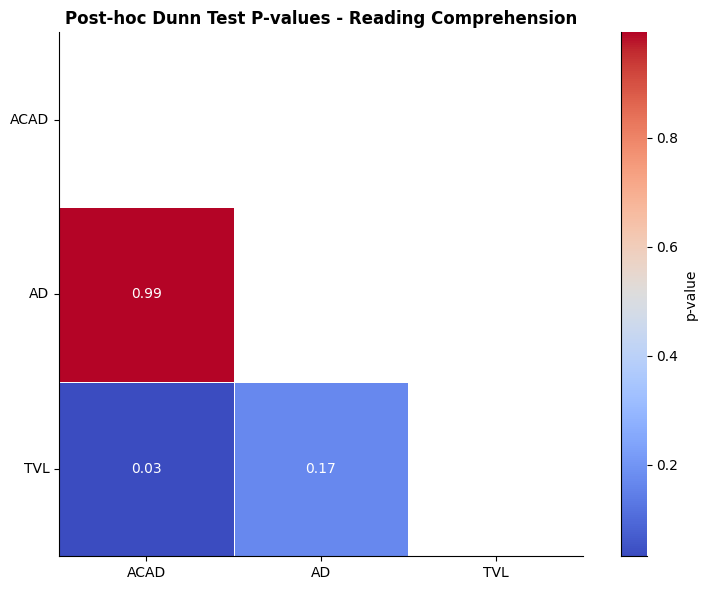

In [ ]:
mask = np.triu(np.ones_like(dunn_results_rounded, dtype=bool))

def heatmap_format(x, original):
    if x == 0.0:
        return f"{original:.2e}"
    else:
        return f"{x:.2f}"

annot = dunn_results_rounded.copy()
for col in dunn_results_rounded.columns:
    annot[col] = [
        heatmap_format(x, dunn_results[col].iloc[i])
        for i, x in enumerate(dunn_results_rounded[col])
    ]

plt.figure(figsize=(8,6))
sns.heatmap(
    dunn_results_rounded,
    mask=mask,
    annot=annot,
    cmap="coolwarm",
    cbar_kws={'label': 'p-value'},
    linewidths=0.5,
    fmt="",
    square=True
)

plt.title("Post-hoc Dunn Test P-values - Reading Comprehension", fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
#spearman-rank correlation
rho, pval = spearmanr(df['Reading Comprehension'], df['Numeracy'])

significance = "Significant correlation" if pval < 0.05 else "No significant correlation"

if abs(rho) >= 0.71:
    strength = "Very Strong Positive" if rho > 0 else "Very Strong Negative"
elif abs(rho) >= 0.40:
    strength = "Strong Positive" if rho > 0 else "Strong Negative"
elif abs(rho) >= 0.30:
    strength = "Moderate Positive" if rho > 0 else "Moderate Negative"
elif abs(rho) >= 0.20:
    strength = "Weak Positive" if rho > 0 else "Weak Negative"
else:
    strength = "Negligible correlation"

spearman_table = pd.DataFrame({
    'Spearman_rho': [rho],
    'p_value': [pval],
    'Significance': [significance],
    'Strength': [strength]
})

print("Spearman Correlation Results:")
print(spearman_table)

Spearman Correlation Results:
   Spearman_rho   p_value             Significance                Strength
0      0.180191  0.006605  Significant correlation  Negligible correlation


In [ ]:
spearman_table.to_excel('spearman_table.xlsx')
from google.colab import files
files.download('spearman_table.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

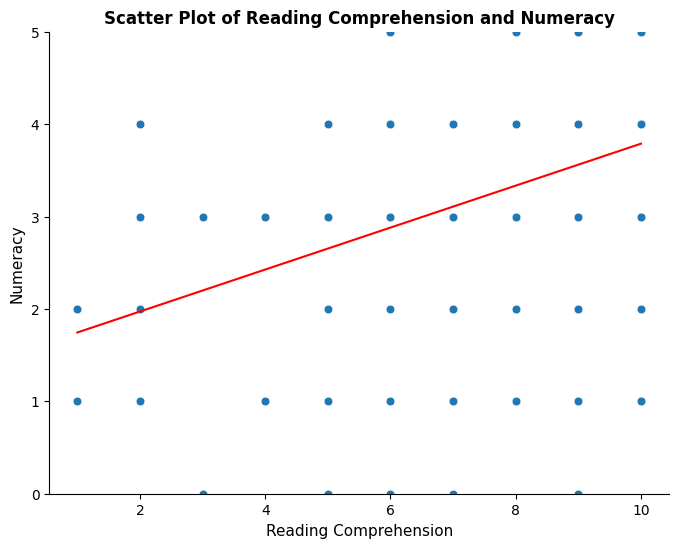

In [ ]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    x='Reading Comprehension',
    y='Numeracy',
    data=df,
    s=40
)

sns.regplot(
    x='Reading Comprehension',
    y='Numeracy',
    data=df,
    scatter=False,
    color='red',
    line_kws={"linewidth":1.5},
    ci=None
)

plt.title("Scatter Plot of Reading Comprehension and Numeracy", fontsize=12, fontweight='bold')
plt.xlabel("Reading Comprehension", fontsize=11)
plt.ylabel("Numeracy", fontsize=11)
plt.ylim(0,5)

sns.despine()

plt.show()